# Visualizing BAM file alignment at the Leptin gene

In [1]:
MIAMIID = !echo $USER
MIAMIID = str(MIAMIID)
MIAMIID = MIAMIID[2:len(MIAMIID)-2]
print(MIAMIID)

schroe51


Recall that our analyzed files are located in following directory
/home/bioinfo/test/kallisto/analyzed

In [2]:
!ls /home/{MIAMIID}/test/kallisto/analyzed

SRR5017128_trimmed.fastq_quant	SRR5017135_trimmed.fastq_quant
SRR5017132_trimmed.fastq_quant	SRR5017137_trimmed.fastq_quant
SRR5017133_trimmed.fastq_quant	SRR5017138_trimmed.fastq_quant


We need a copy of the mouse genome in order to visualize alignment to our samples. We can download that file and decompress it with the following commands:

In [3]:
!mkdir -p /home/{MIAMIID}/test/genomes

In [4]:
%cd /home/{MIAMIID}/test/genomes

/home/schroe51/test/genomes


In [5]:
!wget ftp://ftp.ensembl.org/pub/release-97/fasta/mus_musculus/dna/Mus_musculus.GRCm38.dna.primary_assembly.fa.gz
!gzip -d Mus_musculus.GRCm38.dna.primary_assembly.fa.gz

--2022-12-09 14:51:03--  ftp://ftp.ensembl.org/pub/release-97/fasta/mus_musculus/dna/Mus_musculus.GRCm38.dna.primary_assembly.fa.gz
           => ‘Mus_musculus.GRCm38.dna.primary_assembly.fa.gz’
Resolving ftp.ensembl.org... 193.62.193.139
Connecting to ftp.ensembl.org|193.62.193.139|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/release-97/fasta/mus_musculus/dna ... done.
==> SIZE Mus_musculus.GRCm38.dna.primary_assembly.fa.gz ... 805984352
==> PASV ... done.    ==> RETR Mus_musculus.GRCm38.dna.primary_assembly.fa.gz ... done.
Length: 805984352 (769M) (unauthoritative)

Mus_musculus.GRCm38 100%[===================>] 768.65M  13.8MB/s    in 55s     

2022-12-09 14:52:00 (14.0 MB/s) - ‘Mus_musculus.GRCm38.dna.primary_assembly.fa.gz’ saved [805984352]



# There are many ways to visualize our BAM data. One way is to use the UCSC genome browser, however we cannot do that because our files are not on a public server. Instead we can use IGV, which is a Java application that behaves similarly to UCSC's genome browser and allows us to use our local BAM files.

## To download IGV, you can use the command below or go to their [website](https://software.broadinstitute.org/software/igv/home) 

In [4]:
%cd /home/{MIAMIID}/software
!wget https://data.broadinstitute.org/igv/projects/downloads/2.15/IGV_Linux_2.15.4_WithJava.zip
!unzip IGV_Linux_2.15.4_WithJava.zip
!rm -rf IGV_Linux_2.15.4_WithJava.zip

/home/schroe51/software
--2023-01-16 19:00:44--  https://data.broadinstitute.org/igv/projects/downloads/2.15/IGV_Linux_2.15.4_WithJava.zip
Resolving data.broadinstitute.org... 69.173.92.29
Connecting to data.broadinstitute.org|69.173.92.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71472811 (68M) [application/zip]
Saving to: ‘IGV_Linux_2.15.4_WithJava.zip’

IGV_Linux_2.15.4_Wi 100%[===================>]  68.16M   445KB/s    in 74s     

2023-01-16 19:01:59 (938 KB/s) - ‘IGV_Linux_2.15.4_WithJava.zip’ saved [71472811/71472811]

Archive:  IGV_Linux_2.15.4_WithJava.zip
   creating: IGV_Linux_2.15.4/
   creating: IGV_Linux_2.15.4/jdk-11/
   creating: IGV_Linux_2.15.4/jdk-11/lib/
  inflating: IGV_Linux_2.15.4/jdk-11/lib/libawt.so  
  inflating: IGV_Linux_2.15.4/jdk-11/lib/libmanagement_agent.so  
  inflating: IGV_Linux_2.15.4/jdk-11/lib/libsctp.so  
  inflating: IGV_Linux_2.15.4/jdk-11/lib/libverify.so  
  inflating: IGV_Linux_2.15.4/jdk-11/lib/libawt_xawt.so 

  inflating: IGV_Linux_2.15.4/jdk-11/legal/java.prefs/ADDITIONAL_LICENSE_INFO  
  inflating: IGV_Linux_2.15.4/jdk-11/legal/java.prefs/ASSEMBLY_EXCEPTION  
   creating: IGV_Linux_2.15.4/jdk-11/legal/java.security.jgss/
  inflating: IGV_Linux_2.15.4/jdk-11/legal/java.security.jgss/LICENSE  
  inflating: IGV_Linux_2.15.4/jdk-11/legal/java.security.jgss/ADDITIONAL_LICENSE_INFO  
  inflating: IGV_Linux_2.15.4/jdk-11/legal/java.security.jgss/ASSEMBLY_EXCEPTION  
   creating: IGV_Linux_2.15.4/jdk-11/legal/java.base/
  inflating: IGV_Linux_2.15.4/jdk-11/legal/java.base/unicode.md  
  inflating: IGV_Linux_2.15.4/jdk-11/legal/java.base/LICENSE  
  inflating: IGV_Linux_2.15.4/jdk-11/legal/java.base/ADDITIONAL_LICENSE_INFO  
  inflating: IGV_Linux_2.15.4/jdk-11/legal/java.base/ASSEMBLY_EXCEPTION  
  inflating: IGV_Linux_2.15.4/jdk-11/legal/java.base/aes.md  
  inflating: IGV_Linux_2.15.4/jdk-11/legal/java.base/cldr.md  
  inflating: IGV_Linux_2.15.4/jdk-11/legal/java.base/icu.md  
  inflating: IGV

  inflating: IGV_Linux_2.15.4/jdk-11/legal/java.transaction.xa/LICENSE  
  inflating: IGV_Linux_2.15.4/jdk-11/legal/java.transaction.xa/ADDITIONAL_LICENSE_INFO  
  inflating: IGV_Linux_2.15.4/jdk-11/legal/java.transaction.xa/ASSEMBLY_EXCEPTION  
   creating: IGV_Linux_2.15.4/jdk-11/legal/java.sql.rowset/
  inflating: IGV_Linux_2.15.4/jdk-11/legal/java.sql.rowset/LICENSE  
  inflating: IGV_Linux_2.15.4/jdk-11/legal/java.sql.rowset/ADDITIONAL_LICENSE_INFO  
  inflating: IGV_Linux_2.15.4/jdk-11/legal/java.sql.rowset/ASSEMBLY_EXCEPTION  
   creating: IGV_Linux_2.15.4/jdk-11/legal/java.scripting/
  inflating: IGV_Linux_2.15.4/jdk-11/legal/java.scripting/LICENSE  
  inflating: IGV_Linux_2.15.4/jdk-11/legal/java.scripting/ADDITIONAL_LICENSE_INFO  
  inflating: IGV_Linux_2.15.4/jdk-11/legal/java.scripting/ASSEMBLY_EXCEPTION  
   creating: IGV_Linux_2.15.4/jdk-11/legal/jdk.security.jgss/
  inflating: IGV_Linux_2.15.4/jdk-11/legal/jdk.security.jgss/LICENSE  
  inflating: IGV_Linux_2.15.4/jdk-11/

  inflating: IGV_Linux_2.15.4/jdk-11/conf/security/policy/unlimited/default_local.policy  
  inflating: IGV_Linux_2.15.4/jdk-11/conf/security/java.security  
  inflating: IGV_Linux_2.15.4/jdk-11/conf/security/java.policy  
  inflating: IGV_Linux_2.15.4/jdk-11/NOTICE  
   creating: IGV_Linux_2.15.4/lib/
  inflating: IGV_Linux_2.15.4/lib/sts-2.16.7.jar  
  inflating: IGV_Linux_2.15.4/lib/httpclient-4.5.13.jar  
  inflating: IGV_Linux_2.15.4/lib/jackson-annotations-2.12.1.jar  
  inflating: IGV_Linux_2.15.4/lib/commons-jexl-2.1.1.jar  
  inflating: IGV_Linux_2.15.4/lib/cognitoidentity-2.16.7.jar  
  inflating: IGV_Linux_2.15.4/lib/aws-xml-protocol-2.16.7.jar  
  inflating: IGV_Linux_2.15.4/lib/batik-constants-1.11.jar  
  inflating: IGV_Linux_2.15.4/lib/netty-handler-4.1.59.Final.jar  
  inflating: IGV_Linux_2.15.4/lib/commons-logging-1.2.jar  
  inflating: IGV_Linux_2.15.4/lib/netty-codec-http-4.1.59.Final.jar  
  inflating: IGV_Linux_2.15.4/lib/batik-codec-1.11.jar  
  inflating: IGV_Li

## Now you can use this command to launch the application.

In [3]:
%cd /home/{MIAMIID}/software/IGV_Linux_2.15.4/
!ls
!bash igv.sh

/home/schroe51/software/IGV_Linux_2.15.4
igv.args  igv_hidpi.sh	igv.sh	jdk-11	lib  readme.txt
echo Using bundled JDK.
openjdk version "11.0.13" 2021-10-19
OpenJDK Runtime Environment Temurin-11.0.13+8 (build 11.0.13+8)
OpenJDK 64-Bit Server VM Temurin-11.0.13+8 (build 11.0.13+8, mixed mode)
INFO [Mar 13,2023 12:55] [Globals] Development mode is enabled
INFO [Mar 13,2023 12:55] [Main] Startup  IGV Version 2.15.4 12/08/2022 11:56 AM
INFO [Mar 13,2023 12:55] [Main] Java 11.0.13 (build 11.0.13+8) 2021-10-19
INFO [Mar 13,2023 12:55] [Main] Java Vendor: Eclipse Adoptium https://adoptium.net/
INFO [Mar 13,2023 12:55] [Main] JVM: OpenJDK 64-Bit Server VM Temurin-11.0.13+8   
INFO [Mar 13,2023 12:55] [Main] OS: Linux 3.10.0-1160.76.1.el7.x86_64 amd64
INFO [Mar 13,2023 12:55] [Main] IGV Directory: /home/schroe51/igv
INFO [Mar 13,2023 12:55] [Main] Resoluction scale = 0.0
SLF4J: Failed to load class "org.slf4j.impl.StaticLoggerBinder".
SLF4J: Defaulting to no-operation (NOP) logger implementation

## Now to analyze the differences in expression for the leptin gene on the mouse genome version mm10, follow along with the screenshots:

## Step 1:
### At the top left, the orgnaism will by default be Human, you need to open the drop down menu and select more. That will then open a menu in the center of the screen where you need to filter with "mouse" and select "mouse mm10"
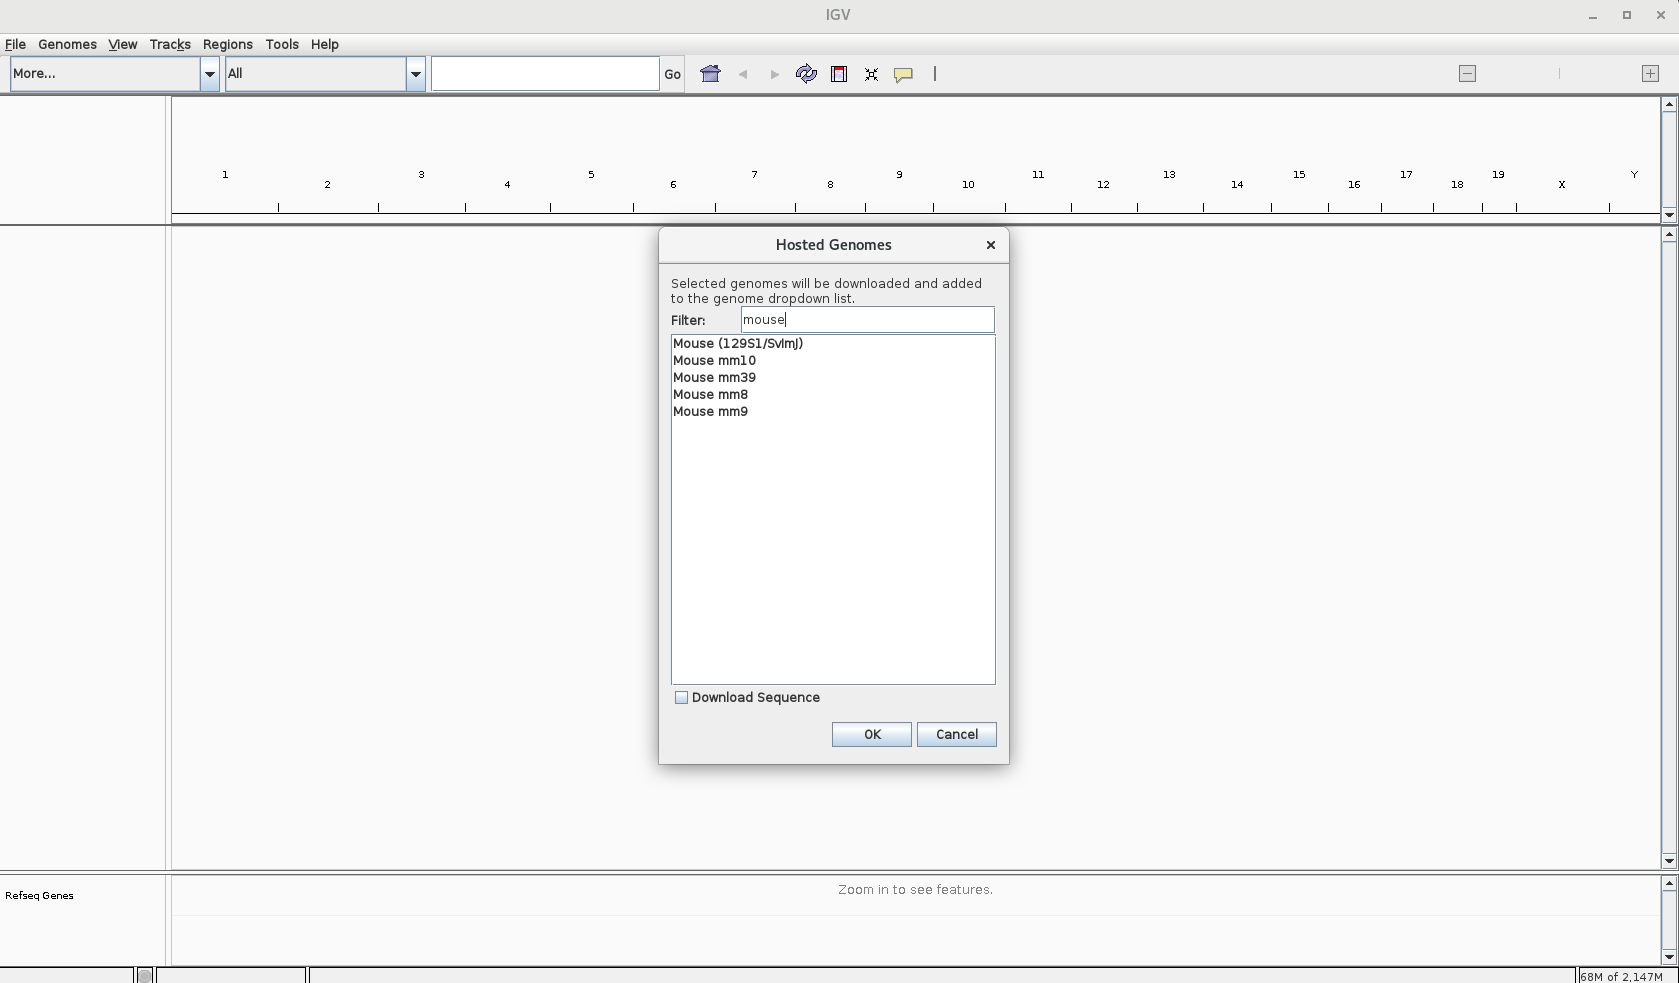

## Step 2:
### Now you need to go to the text box, two rectangles to the right of the organism select, and type "LEP" and select "LEP" from the autofill suggestions.
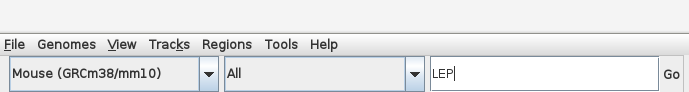

## Step 3:
### Now you need to load the BAM track files of any of the ones we generated with kallisto. To do this, select file at the top left and press "Load from File" and navigate to the desired BAM files. For an example, we can analyze the High-Fat Diet Control 1 and High-Fat Diet Tumor 1 mouse. To do this navigate to:
- /home/{MIAMIID}/test/kallisto/analyzed/SRR5017135_trimmed.fastq_quant/pseudoalignments.bam 
### For High-Fat Diet Control 1. 
### Then load another file, this time use:
- /home/{MIAMIID}/test/kallisto/analyzed/SRR5017132_trimmed.fastq_quant/pseudoalignments.bam
### For High-Fat Diet Tumor 1.

## Step 4:
### Now hit the button at the top that resizes the tracks to fit the window.
### Since we are using small fastq files, you will not see the following, but we have provided a screenshot to show you what it should look like when you are using the full dataset:
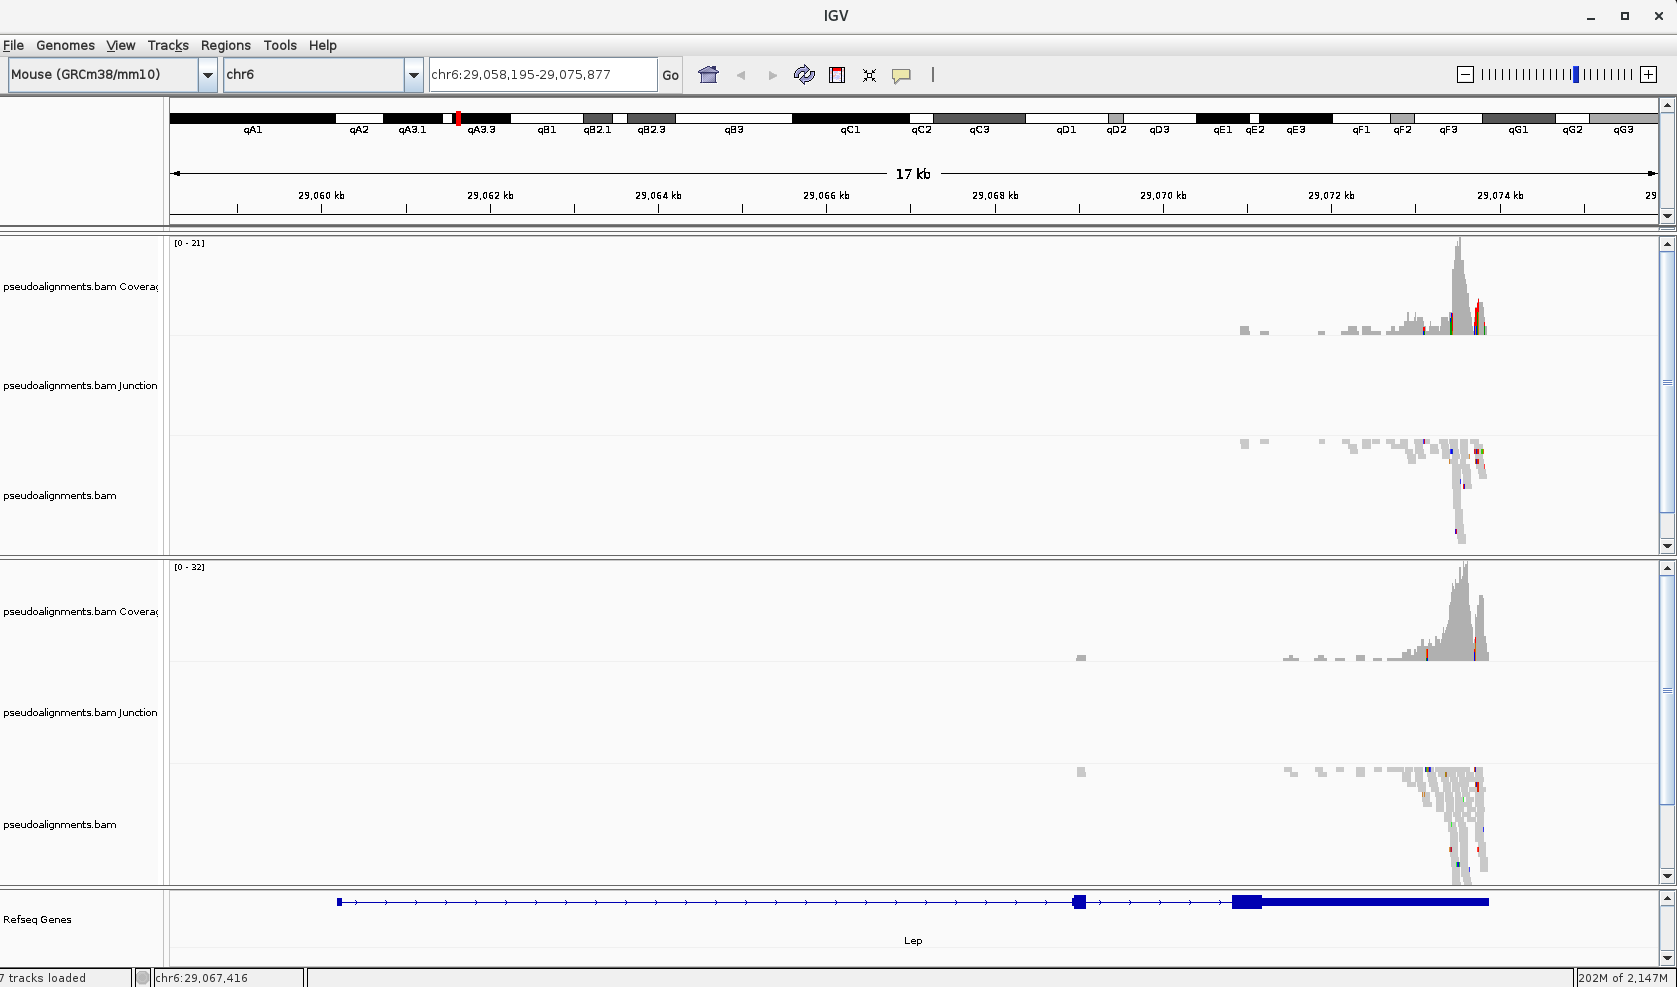

# Congrats, now you have succesfully analyzed multiple RNA-Sequences! Feel free to analyze any other combination of BAM files to see some differences in expression between different samples.